**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df=pd.read_csv('cleaned_data.csv')

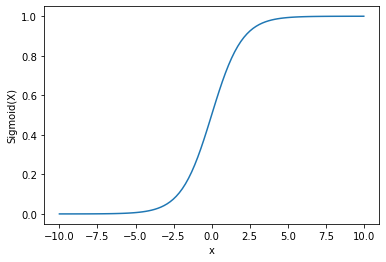

In [10]:
# Define the sigmoid function
def sigmoid_function(x):
    z=1/(1/1+np.exp(-x))
    return z

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [13]:
# Create a train/test split
from sklearn.model_selection import train_test_split
x=df[['PAY_1','LIMIT_BAL']]
y=df['default payment next month']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [21]:
# Fit the logistic regression model on training data
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [22]:
# Make predictions using `.predict()`
predictions=model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Find class probabilities using `.predict_proba()`
class_probability=model.predict_proba(x_test)
class_probability

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [28]:
# Add column of 1s to features
column_1=np.hstack([np.ones((x_test.shape[0],1)),x_test])
column_1

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [34]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Trained Logistic Model',model.coef_)
print('Intercepts of Trained Logistic Model',model.intercept_)
model_coefficient=model.coef_
model_intercept=model.intercept_

Coefficients Of Trained Logistic Model [[ 8.27451187e-11 -6.80876727e-06]]
Intercepts of Trained Logistic Model [-6.57647457e-11]


In [36]:
coefficient_intercept_features=np.concatenate([model_intercept.reshape(1,1),model_coefficient],axis=1)
coefficient_intercept_features

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [37]:
# Manually calculate predicted probabilities
manual_probability=np.dot(coefficient_intercept_features,np.transpose(column_1))
manual_probability

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

In [39]:
sigmoid_probability=sigmoid_function(manual_probability)
sigmoid_probability

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [40]:
# Manually calculate predicted classes
pred_class=sigmoid_probability>=0.5

In [48]:
# Compare to scikit-learn's predicted classes
print(pred_class.shape)
print(predictions.shape)
np.array_equal(pred_class,predictions.reshape(1,-1))

(1, 5333)
(5333,)


True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [50]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
metrics.roc_auc_score(y_test,class_probability[:,1])

0.627207450280691

In [51]:
# Use manually calculated predicted probabilities to calculate ROC AUC
metrics.roc_auc_score(y_test,manual_probability.reshape(manual_probability.shape[1],))

0.627207450280691